# Project_3_Biogic_analysis
* Qing Dou
* Github:https://github.com/qdou14/Biopic_analysis_project_4.git

## 1 Introduction

This study evaluates diversity in biopics, focusing on race and gender representation, and their impact on box office earnings. We'll examine data from numerous biopics, analyzing gender and race of subjects, and their financial success. Research questions include:

* Representation: How are various races and genders depicted in top-grossing films?
* Correlation: Does diversity correlate with box office performance?
* Which factors that contribute to the box office success of biographical films. 

We'll also use Bechdel test data to enhance our analysis, offering a thorough perspective on biographical film diversity. 




## 2 Data Summary

* This project uses a biopics dataset from FiveThirtyEight, available on GitHub (https://github.com/fivethirtyeight/data/tree/master/biopics).The dataset includes films depicting real-life individuals. 
* In Project 4, I located a database and merged IMDB ratings with budget data into a table. This will provide better assistance for the upcoming Predictive Modeling with scikit-learn.

### 2.1 Merging Data
In this step, I am merging biopic movie data This is done to enrich our dataset for further analysis and modeling.

In [1]:
from src.biopic_analysis.data_summary import DataProcess

# URL of the biopic movie dataset
data_url = 'https://raw.githubusercontent.com/qdou14/biopic_analysis/main/dataset/biopics_dataset.csv'
data_processor = DataProcess(data_url)

# Merge the movie data using a different URL
df = data_processor.merge_movie_data('https://raw.githubusercontent.com/qdou14/Biopic_analysis_project_4/main/movie_data.csv')
df.head()

,movie_title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress,budget,imdb_score
0,10 Rillington Place,http://www.imdb.com/title/tt0066730/,UK,1971,-,Richard Fleischer,1,John Christie,Criminal,Unknown,NaN,0,Male,Richard Attenborough,NaN,NaN
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,2013,$56.7M,Steve McQueen,1,Solomon Northup,Other,Known,African American,1,Male,Chiwetel Ejiofor,20000000.0,8.1
2,127 Hours,http://www.imdb.com/title/tt1542344/,US/UK,2010,$18.3M,Danny Boyle,1,Aron Ralston,Athlete,Unknown,NaN,0,Male,James Franco,18000000.0,7.6
3,1987,http://www.imdb.com/title/tt2833074/,Canada,2014,-,Ricardo Trogi,1,Ricardo Trogi,Other,Known,White,0,Male,Jean-Carl Boucher,NaN,NaN
4,20 Dates,http://www.imdb.com/title/tt0138987/,US,1998,$537K,Myles Berkowitz,1,Myles Berkowitz,Other,Unknown,NaN,0,Male,Myles Berkowitz,60000.0,5.3


In [2]:
# Check the data types of each column.
column_types = df.dtypes
column_types

movie_title            object
site                   object
country                object
year_release            int64
box_office             object
director               object
number_of_subjects      int64
subject                object
type_of_subject        object
race_known             object
subject_race           object
person_of_color         int64
subject_sex            object
lead_actor_actress     object
budget                float64
imdb_score            float64
dtype: object

### 2.2 Data Preprocessing
In this section, we perform essential data preprocessing and some feature engineering tasks on the dataset.
*  We convert the 'box_office' column values to numerical format for analysis.
*  We add a 'category' column to the dataset, enhancing its information for further analysis.

In [3]:
# Convert the 'box_office' column values to numerical format.
data_processor.convert_box_office()

# Add a 'category' column.
data_processor.add_category()
data_processor.get_data().head()

,movie_title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress,budget,imdb_score,category
0,10 Rillington Place,http://www.imdb.com/title/tt0066730/,UK,1971,NaN,Richard Fleischer,1,John Christie,Criminal,Unknown,NaN,0,Male,Richard Attenborough,NaN,NaN,<NA>
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,2013,56700000.0,Steve McQueen,1,Solomon Northup,Other,Known,African American,1,Male,Chiwetel Ejiofor,20000000.0,8.1,Non-White Male
2,127 Hours,http://www.imdb.com/title/tt1542344/,US/UK,2010,18300000.0,Danny Boyle,1,Aron Ralston,Athlete,Unknown,NaN,0,Male,James Franco,18000000.0,7.6,<NA>
3,1987,http://www.imdb.com/title/tt2833074/,Canada,2014,NaN,Ricardo Trogi,1,Ricardo Trogi,Other,Known,White,0,Male,Jean-Carl Boucher,NaN,NaN,White Male
4,20 Dates,http://www.imdb.com/title/tt0138987/,US,1998,537000.0,Myles Berkowitz,1,Myles Berkowitz,Other,Unknown,NaN,0,Male,Myles Berkowitz,60000.0,5.3,<NA>


### 2.3 Data Understanding

In this section, we check general information about the dataset, such as missing values and summary statistics.

In [4]:
# Check information about the dataset.
data_processor.check_data()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 762
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         763 non-null    object 
 1   site                763 non-null    object 
 2   country             763 non-null    object 
 3   year_release        763 non-null    int64  
 4   box_office          439 non-null    float64
 5   director            763 non-null    object 
 6   number_of_subjects  763 non-null    int64  
 7   subject             763 non-null    object 
 8   type_of_subject     763 non-null    object 
 9   race_known          763 non-null    object 
 10  subject_race        566 non-null    object 
 11  person_of_color     763 non-null    int64  
 12  subject_sex         763 non-null    object 
 13  lead_actor_actress  756 non-null    object 
 14  budget              245 non-null    float64
 15  imdb_score          257 non-null    float64
 16  category

We can observe that there are some missing values in the data. However, in the upcoming exploratory data analysis, we will focus on analysis without performing calculations. The data preprocessing and handling of missing values will be addressed in the modeling phase.

Below is a description of the variables in the dataset

| Variable | Description |
|----------|-------------|
| title | Title of the film. |
| site | URL from IMDB. |
| country | Country of origin. |
| year_release | Year of release. |
| box_office | Gross earnings at U.S. box office. |
| director | Director of film. |
| number_of_subjects | The number of subjects featured in the film. |
| subject | The actual name of the featured subject. |
| type_of_subject | The occupation of subject or reason for recognition. |
| race_known | Indicates whether the subject’s race was discernible based on background of self, parent, or grandparent. |
| subject_race | Race of the subject. |
| person_of_color | Dummy variable that indicates person of color. |
| subject_sex | Sex of subject. |
| lead_actor_actress | The actor or actress who played the subject. |
| budget | Budget of the movie in Dollars |
| imdb_score | IMDB Score of the movie on IMDB |
| category | Categorizing subjects into 'White Male', 'White Female', 'Non-White Male', 'Non-White Female', or 'Unknown'. |

## 3: Exploratory Data Analysis

In this section we will focuse on conducting Exploratory Data Analysis (EDA) to gain insights and discover patterns in the dataset.

In [5]:
from src.biopic_analysis.exploratory_data_analysis import EDA
eda = EDA(df)

# Generate summary statistics for categorical columns in the DataFrame.
data_processor.describe_categorical()

,movie_title,site,country,director,subject,type_of_subject,race_known,subject_race,subject_sex,lead_actor_actress,category
count,763,763,763,763,763,763,763,566,763,756,566
unique,668,672,7,488,699,27,2,17,2,574,4
top,The Bang Bang Club,http://www.imdb.com/title/tt1173687/,US,Clint Eastwood,Jesus,Other,Known,White,Male,Leonardo DiCaprio,White Male
freq,4,4,490,9,7,159,566,429,586,7,327


From this table, we can already draw some preliminary conclusions. The biopic movies in this dataset are primarily from the United States. It suggests a dominance of white male subjects in films, indicating racial and gender bias in biopics and the important position of white men in society at that time.

### 3.1 Analyzing Race and Gender Distribution among Subjects

- In this step, we begin by counting the frequency of each race in the 'subject_race' column because numerical values provide a more straightforward representation of the content.
- Additionally, we create a stacked plot to visualize the distribution of race and sex among the subjects, allowing us to further examine the intersection of race and gender in the dataset.

In [6]:
# Count occurrences of each race in 'subject_race' column.
country_subject_race = eda.unique_value_counts('subject_race')
country_subject_race

White                        429
African American              35
Multi racial                  24
Middle Eastern (White)        14
Hispanic (Latin American)     13
Middle Eastern                11
African                        9
Hispanic (Latino)              6
Hispanic (White)               6
Asian                          5
Native American                4
Asian American                 3
Indian                         2
Caribbean                      2
Mediterranean                  1
Eurasian                       1
Hispanic (Latina)              1
Name: subject_race, dtype: int64

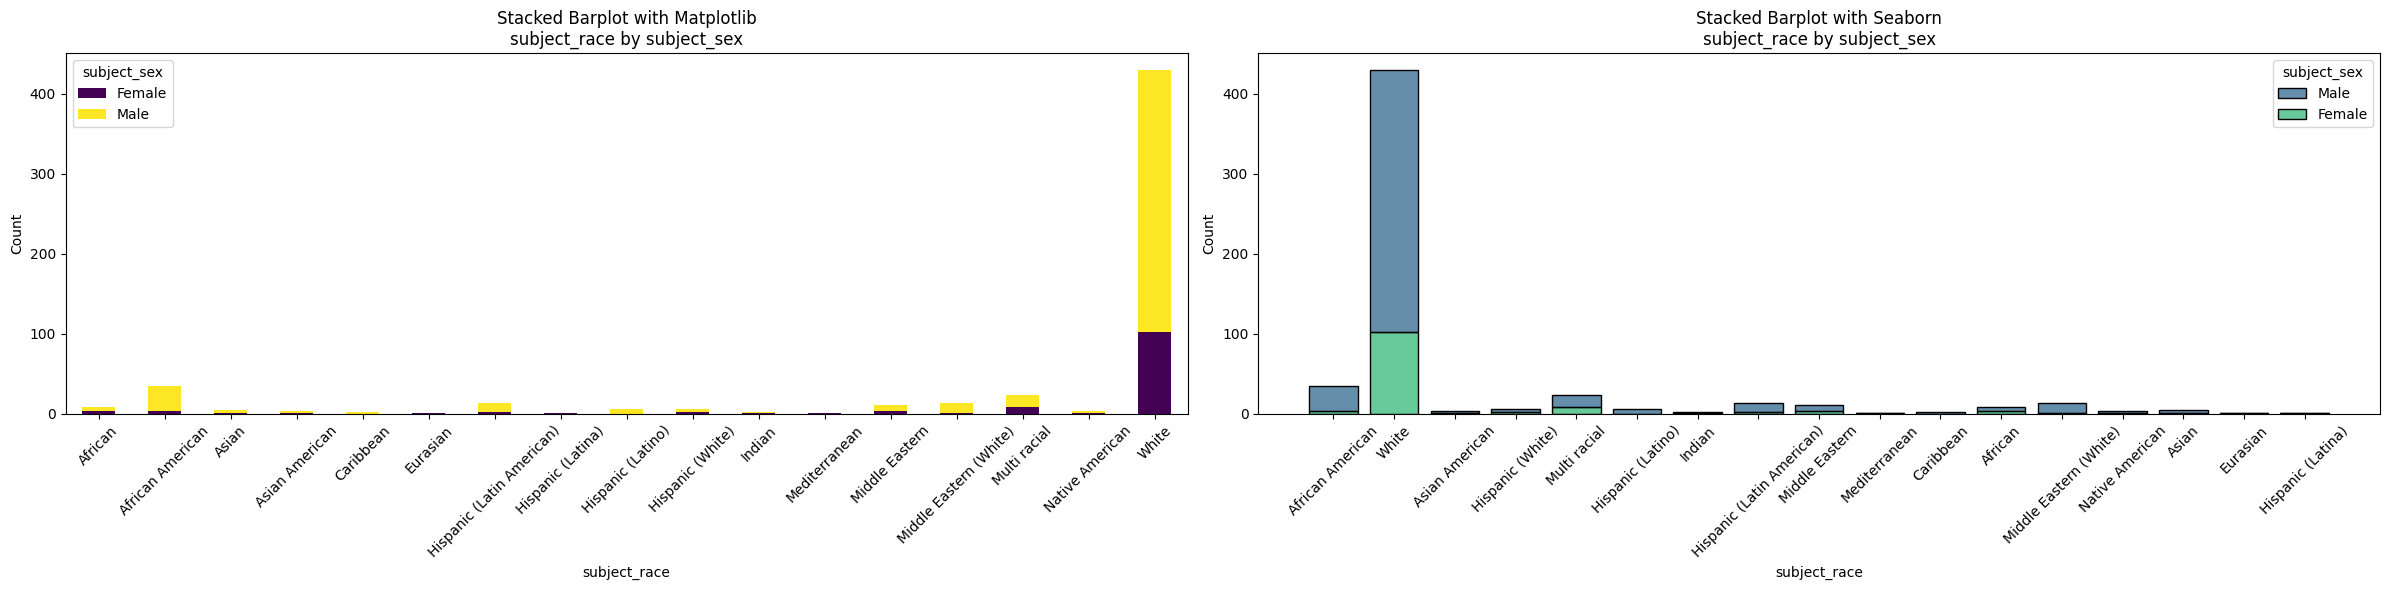

In [7]:
# Display a stacked plot of race and sex distributions.
eda.combined_category_plot('subject_race', 'subject_sex')

Conclusions:
* The dataset demonstrates diversity in the racial composition of subjects, with a total of 17 different subject race categories identified. 
* Among these, White subjects predominate, totaling 429, and constitute the majority.The representation of male subjects is higher than that of females across almost all racial categories.

### 3.2 Analysing Categories in Different Types of Subjects 

- In these steps, we start by counting the unique values in the 'type_of_subject' column to assess the diversity of subject types in the dataset. 
- Next, we create a combined category plot to visualize the connection between 'type_of_subject' and 'category' variables.  The inclusion of 'category' is aimed at facilitating a more comprehensive analysis of the diversity within different types of biographical films.

In [8]:
# Get the count of unique values in the 'type_of_subject' column.
country_types_of_subject = eda.unique_value_counts('type_of_subject')
country_types_of_subject

Other                     159
Criminal                   81
Historical                 77
Musician                   76
Athlete                    74
Author                     45
Military                   45
Activist                   31
Artist                     29
Academic                   21
Singer                     20
World leader               17
Actress                    16
Media                      15
Actor                      14
Author (poet)              13
Medicine                    9
Comedian                    7
Government                  4
Journalist                  2
Athlete / military          2
Military / activist         1
Politician                  1
Teacher                     1
Actress / activist          1
Actress                     1
Academic (Philosopher)      1
Name: type_of_subject, dtype: int64

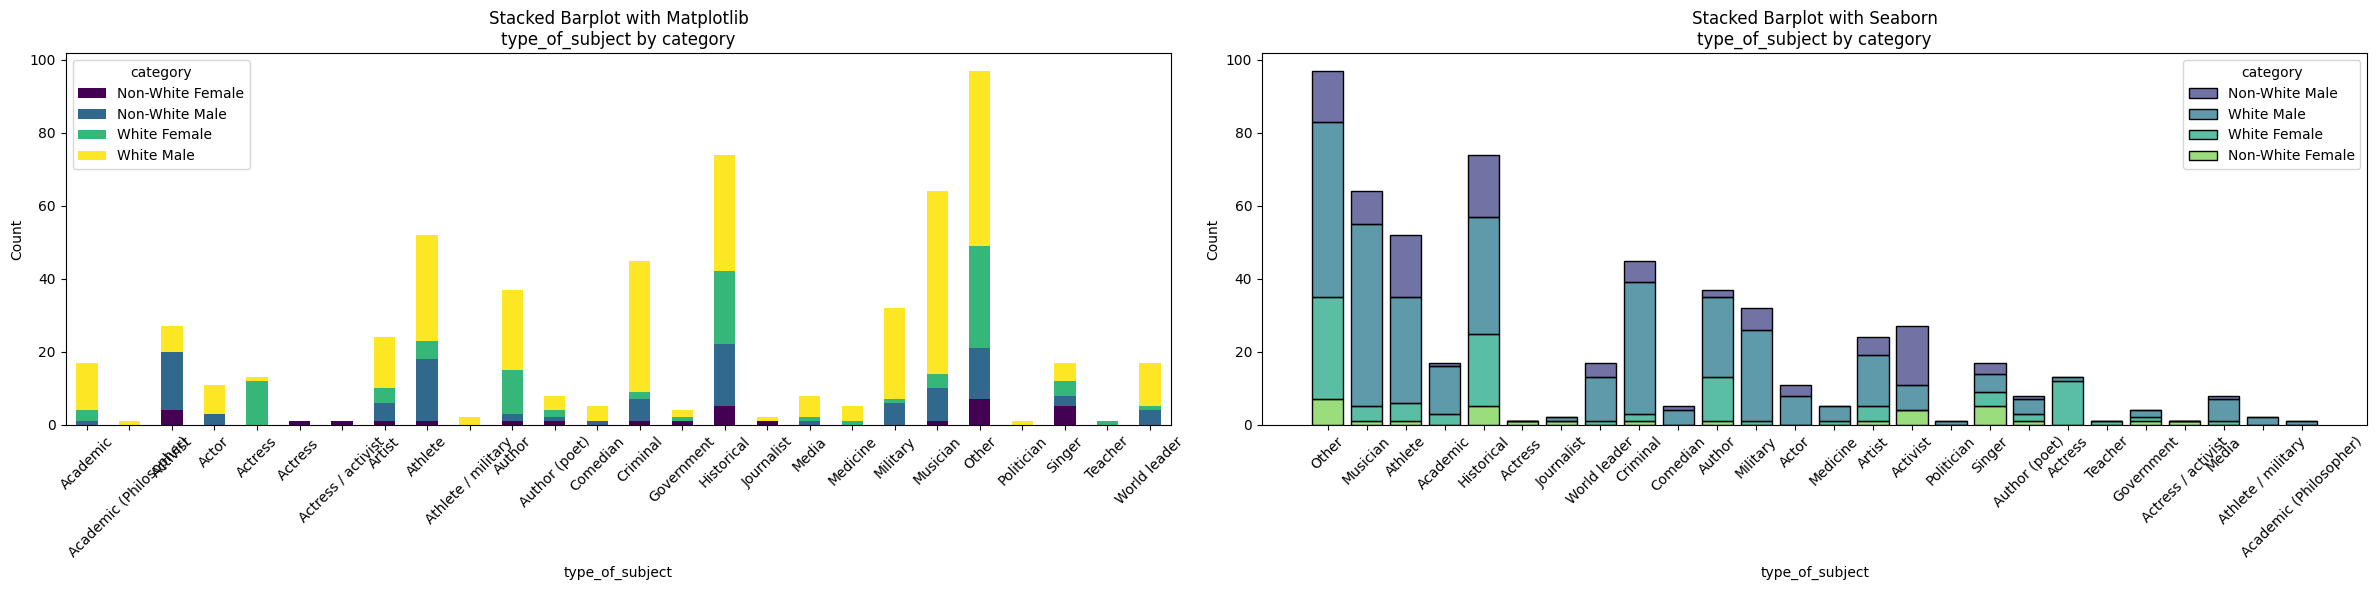

In [9]:
eda.combined_category_plot('type_of_subject', 'category')

Conclusions:

* There are many movies about "Criminals," "Historical" figures, and "Musicians." Their exciting stories might make these movies more entertaining.
* White men are shown more than others in all types of movies. And this is very clear in movies about politicians and businesspeople.
* Women of color are shown the least, especially in movies about politics, business, and science.This may indicate that during that time, women, particularly women of color, held marginalized positions in the world of politics."

### 3.3 Analysing Categories in Different Years

Now, let's examine whether there is any improvement in racial and gender representation over time.

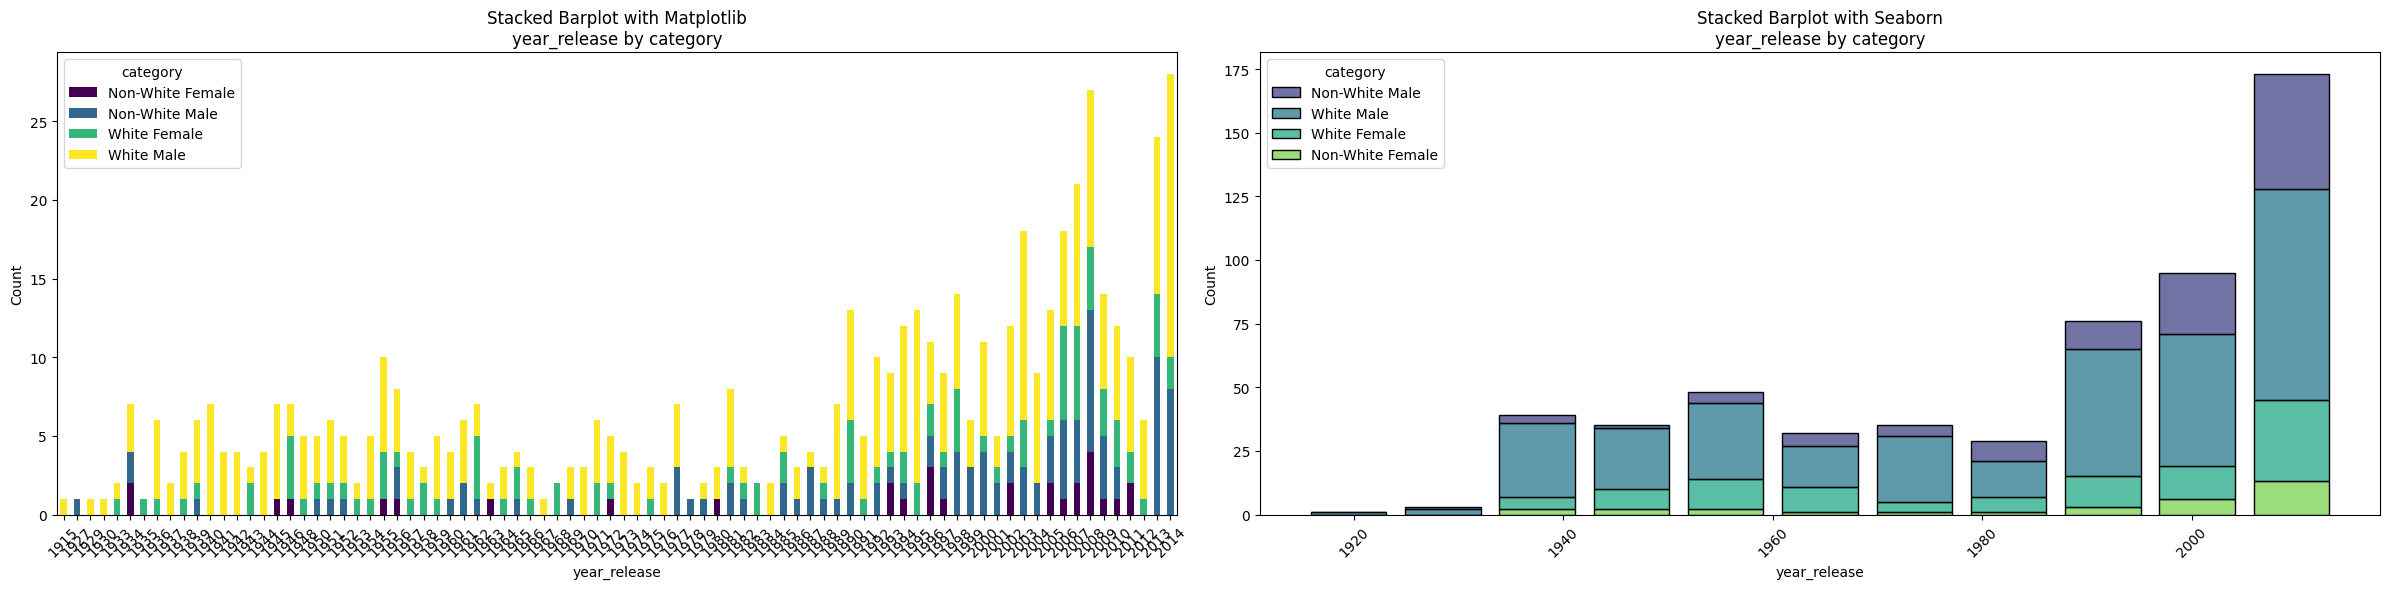

In [10]:
eda.combined_category_plot('year_release', 'category')

Conclusions:

* Prior to 1975, white males predominantly dominated the annual releases, likely reflecting the era's biases and possibly lower representation of people of color.
* Although there has been a growth in representation for other racial and gender groups, they have not surpassed that of white males.


### 3.4 Analyzing Box Office Performance and Its Relationship with Categories

First, let’s take a look at the box office data performance.

In [11]:
# Get descriptive statistics for the 'box_office' column.
box_office_stats = eda.describe_stats('box_office')
box_office_stats

count    4.390000e+02
mean     2.328878e+07
std      3.853244e+07
min      3.150000e+03
25%      1.170000e+06
50%      6.200000e+06
75%      3.050000e+07
max      3.500000e+08
Name: box_office, dtype: float64

The dataset exhibits a wide range of box office earnings for the movies, with values ranging from a minimum of $3,150 to a maximum of $256 million. This suggests that in our subsequent modeling work, we may need to address outliers. The average box office earnings for the movies are approximately $2,180,864, while the median box office earnings (at the 50th percentile) stand at around $6,370,000.

Next let’s break down how people of different races and genders fare at the box office.

d:\pyhtonP4\biopic_analysis\src\biopic_analysis\exploratory_data_analysis.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


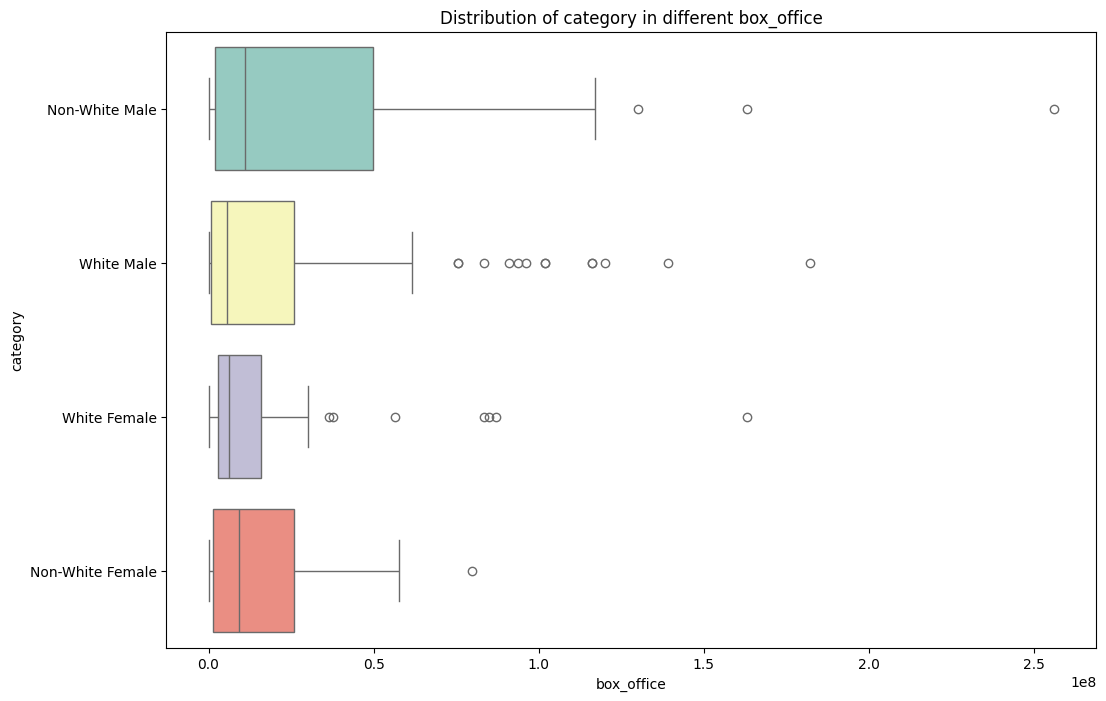

In [12]:
# Plot 'box_office' data using a column plot method in EDA.
eda.column_boxplot("box_office",'category')

Conclusions

* Non-white females show the lowest median box office revenue with minimal variation.
* White males command higher median revenues with a broader revenue range.
* Non-white males and white females share similar median revenues, but non-white males exhibit greater revenue variability.

## 4: Inference

In [13]:
# Import the Inference class from the inference module in the src/biogic_analysis directory.
from src.biopic_analysis.inference import Inference
inference_analysis = Inference(df)


### 4.1 Diversity in Gender and Race:

What is the representation of characters of different races and genders in the top 100 highest-grossing films?

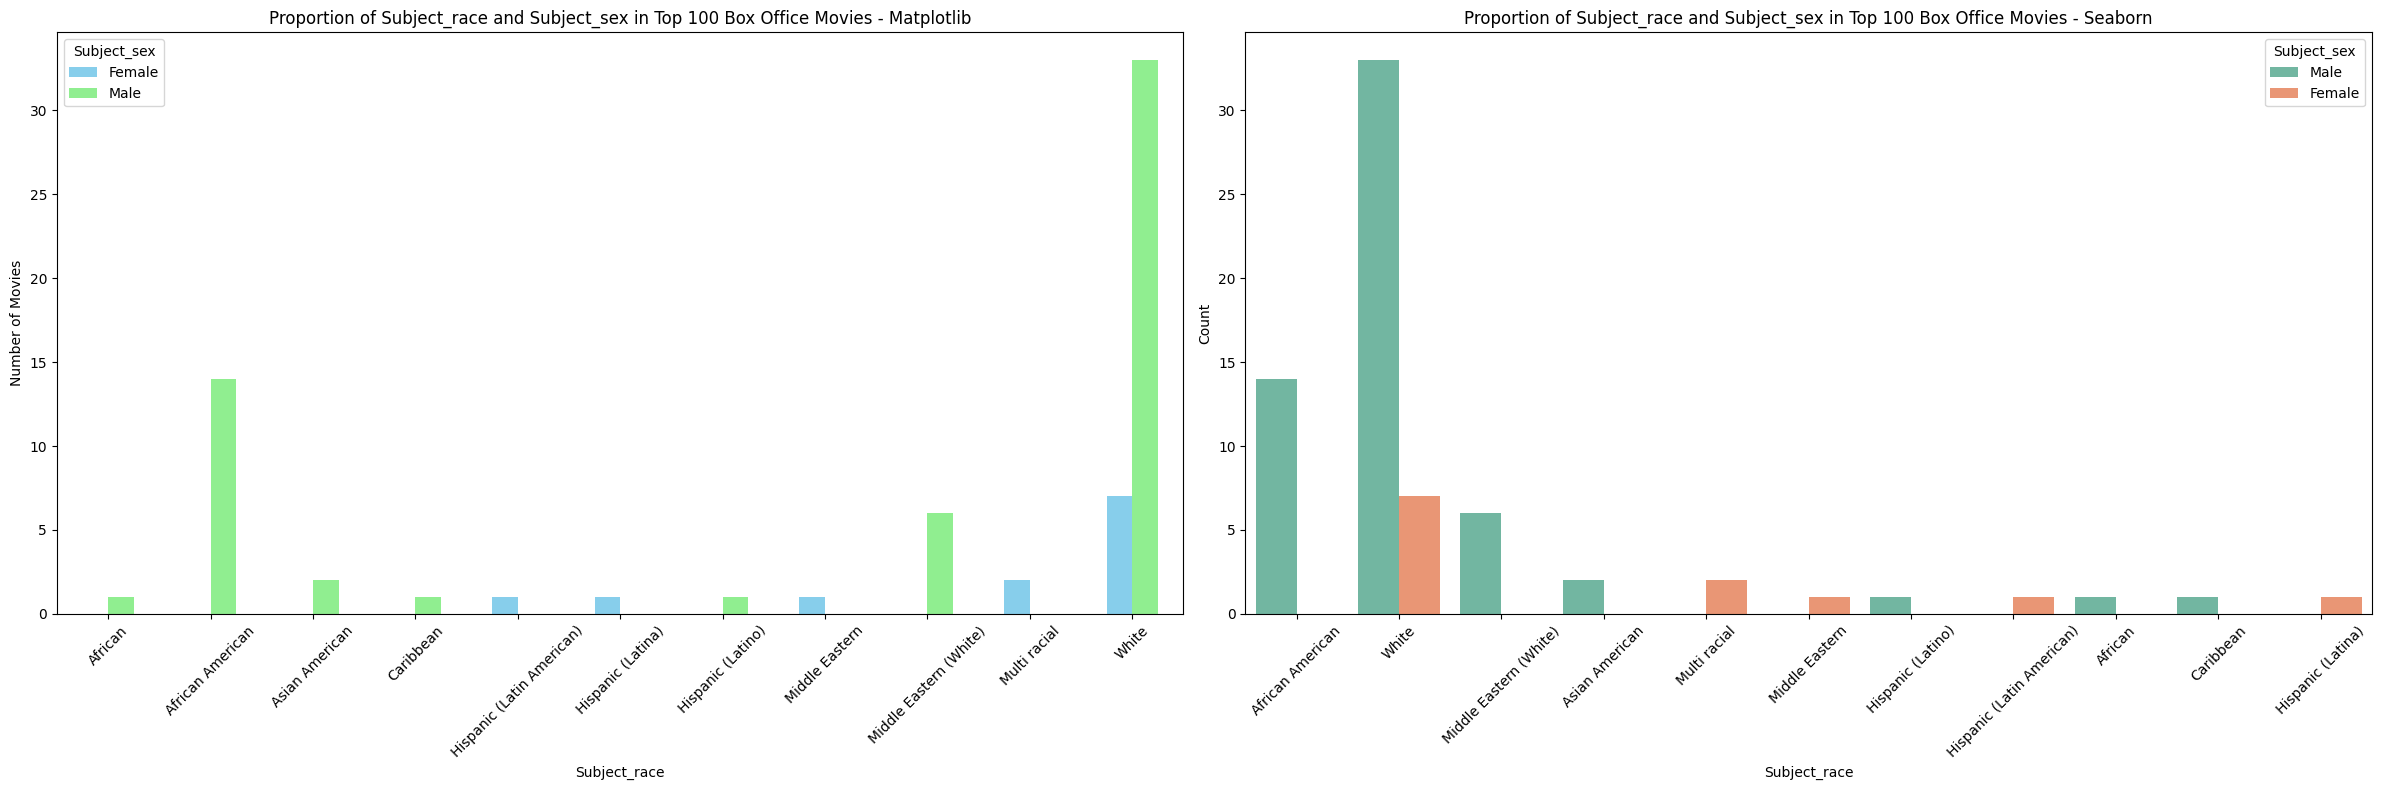

In [14]:
# Analyze the proportion of different races and sexes in the top box office category.
inference_analysis.proportion_in_top_box_office('subject_race', 'subject_sex')

Conclusion:

* White males and females dominate character roles in the top 100 grossing films.
* Non-white males are slightly more represented than non-white females but far less than their white counterparts.
A significant racial and gender imbalance favors white individuals.
* Non-white females are the least represented group.

### 4.2 Box Office and Diversity Relationship:

Does the racial and gender diversity of a movie affect its box office performance?

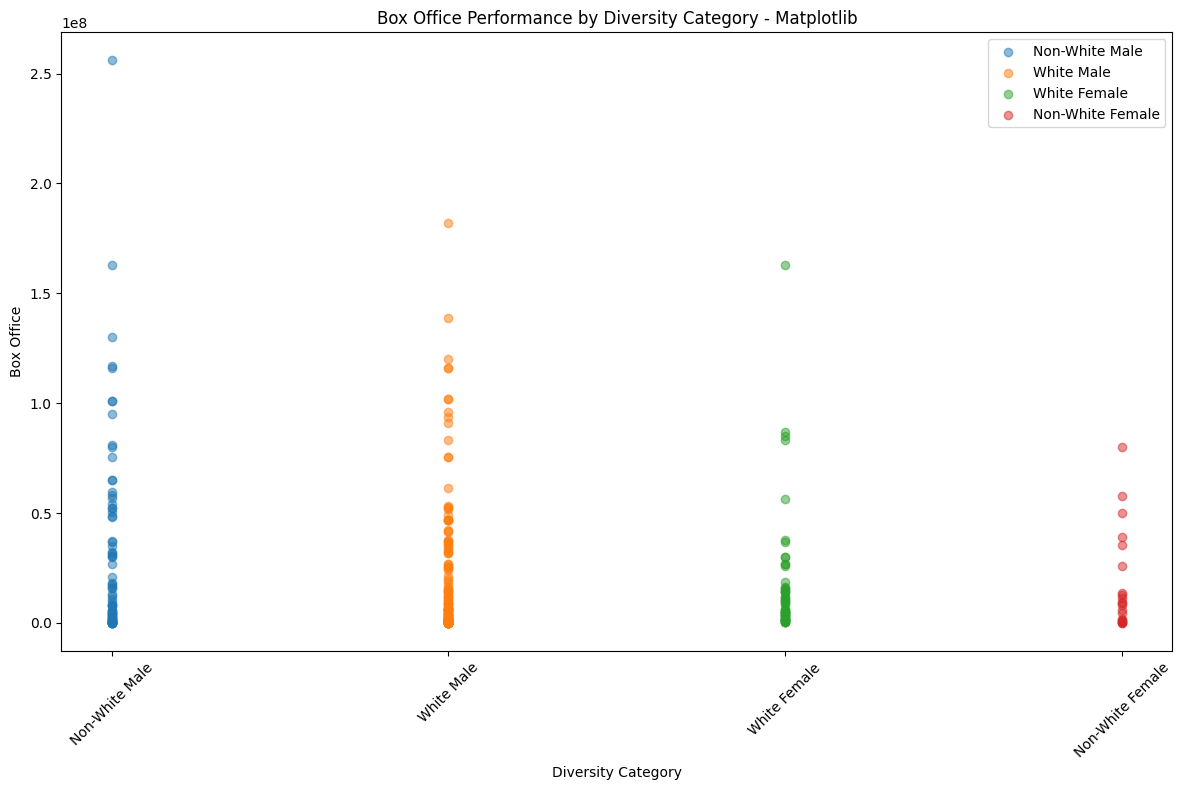

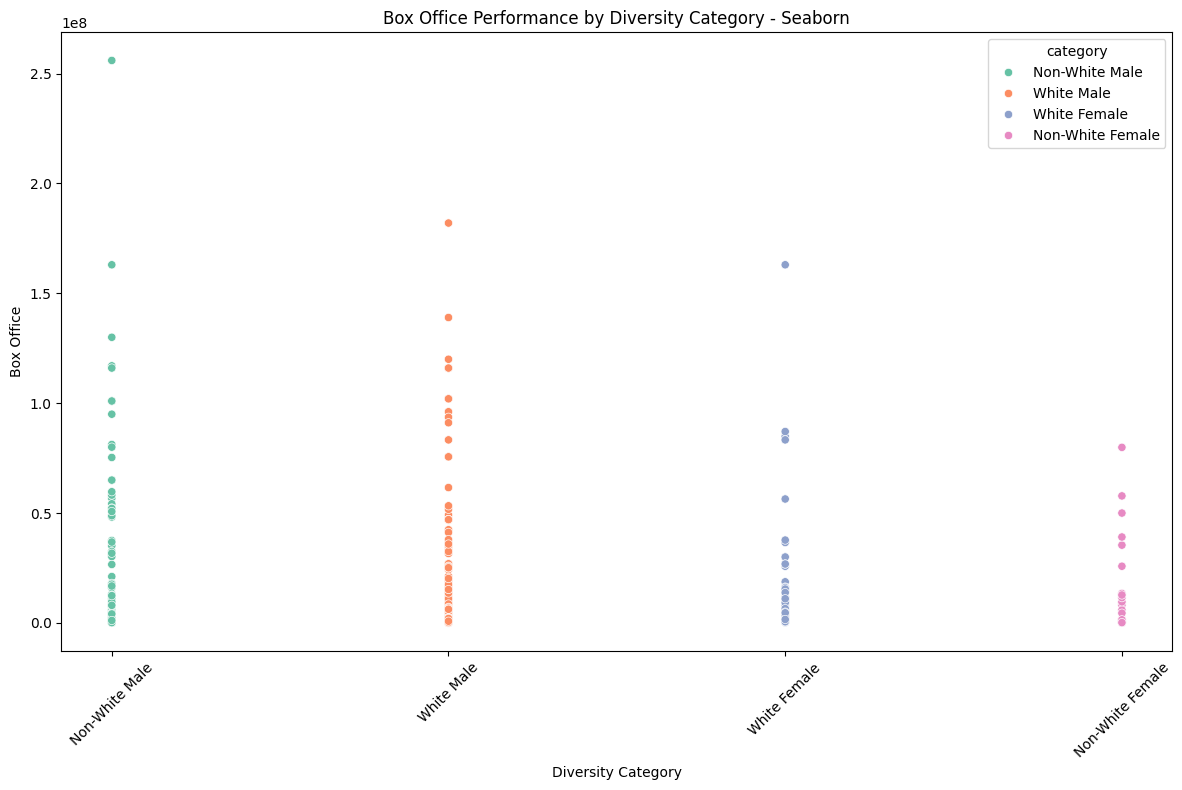

In [15]:
# Evaluate the correlation between box office success and diversity factors.
inference_analysis.box_office_diversity_correlation()

The chart suggests:

* "White Male" films have a wide range of box office earnings, with frequent high peaks.
* "Non-White Female" films generally earn less at the box office, reflecting industry biases or disparities in opportunities.

## 5 Building model

### 5.1 Data Preprocessing

Preprocessing is crucial for cleaning and preparing the data for analysis and modeling.  We preprocess to ensure data quality by removing incomplete records and focusing on essential variables that likely influence a movie's success. The process involves discarding rows with missing financials, refining the dataset to key columns, and introducing a 'success' metric based on box office earnings.


In [16]:
from src.biopic_analysis.building_model import ModelBuilding
model_building = ModelBuilding()
df = model_building.preprocess(df)
df.head()

,movie_title,country,year_release,box_office,type_of_subject,person_of_color,subject_sex,budget,imdb_score,success
1,12 Years a Slave,US/UK,2013,56700000.0,Other,1,Male,20000000.0,8,1
2,127 Hours,US/UK,2010,18300000.0,Athlete,0,Male,18000000.0,8,1
4,20 Dates,US,1998,537000.0,Other,0,Male,60000.0,5,0
5,21,US,2008,81200000.0,Other,1,Male,35000000.0,7,1
7,42,US,2013,95000000.0,Athlete,1,Male,40000000.0,8,1


### 5.2 Pairplot Visualization

Creating a pairplot to visually explore relationships between different variables in the dataset. This aids in understanding the distribution and correlations of the data, this helps guide subsequent data processing and model-building strategies.

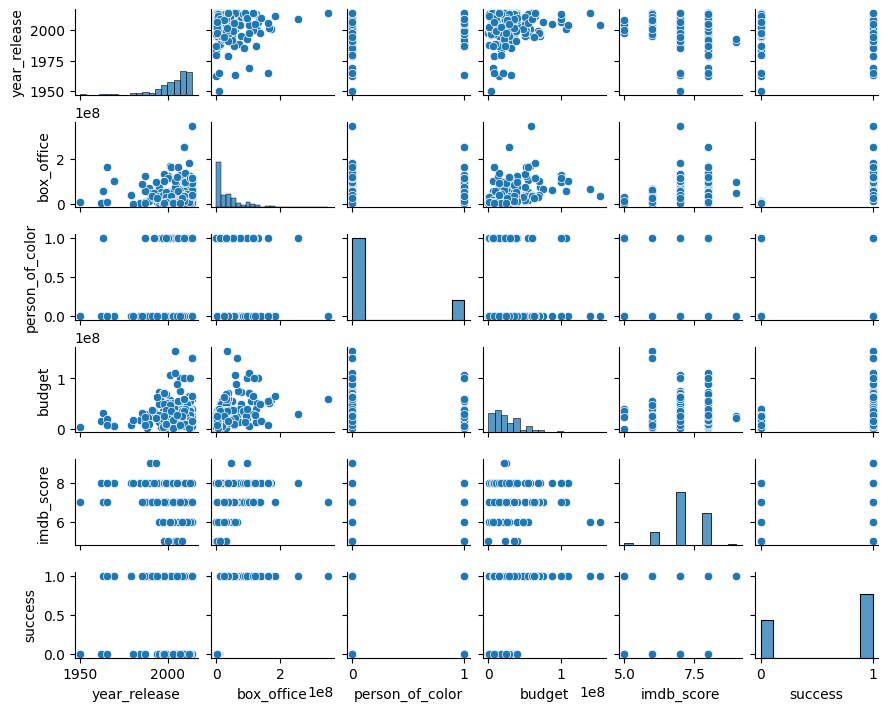

In [17]:
model_building.pairplot(df)

### 5.3 Heatmap for Correlation Analysis

Generating a heatmap to visualize correlations among features.This helps in identifying potential predictors for the model and understanding feature relationships.

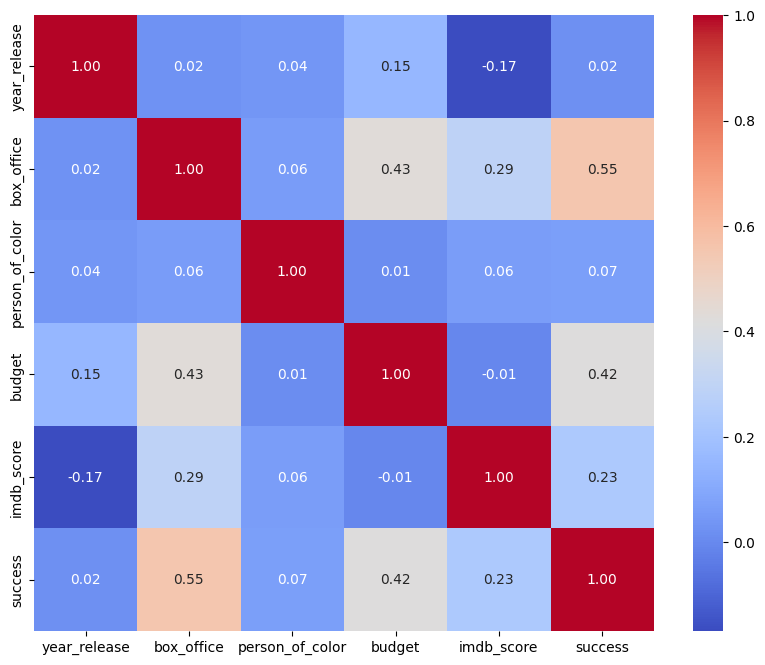

In [18]:
model_building.heatmap(df)

### 5.4 Model Building

Building a RandomForestClassifier model using sklearn pipeline and cross-validation. 

In [19]:
model = model_building.build_model(df)

CV accuracy scores: [0.61111111 0.6        0.57142857 0.77142857 0.74285714]
CV accuracy mean: 0.6593650793650794
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        20
           1       0.85      0.92      0.88        24

    accuracy                           0.86        44
   macro avg       0.87      0.86      0.86        44
weighted avg       0.87      0.86      0.86        44



### 5.5 Regression Analysis

Conducting regression analysis to explore the relationship between budget and box office earnings.
This section includes fitting the model, plotting the results, and evaluating the performance using R-squared values.
Regression is chosen based on the continuous nature of the target variable (box office earnings).

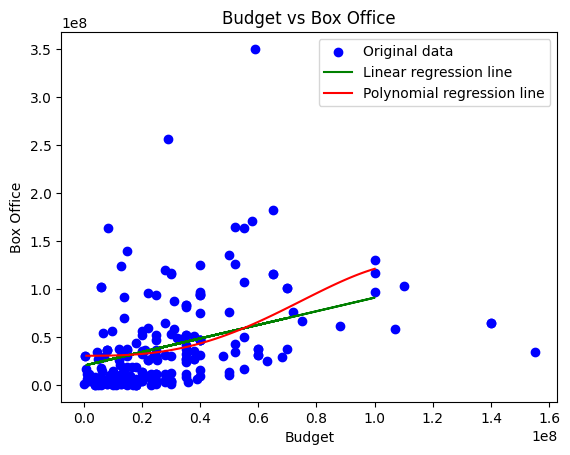

{'Linear Regression R-squared': 0.40530724750750413, 'Polynomial Regression R-squared': 0.4096382939040978}


In [20]:
regression_results = model_building.fit_and_plot(df)
print(regression_results)

## 6: Conclusion

The analysis of Hollywood biographical films from 1915 to 2014 reveals a stark imbalance in gender and racial representation. About a quarter of these films featured women, with only 21 focusing on women of color. Over 80% of subjects were white and 77% male, a trend also evident in the top 100 highest-grossing films. The 1990s saw a significant skew towards white subjects.

This pattern reflects historical societal biases, particularly the early focus on white male figures in biopics. While there has been some progress in recent years, the imbalance is still pronounced. Emerging platforms like television and Netflix, however, provide avenues for more diverse biographical stories. This shift highlights the ongoing need to diversify storytelling in the biographical film genre.

## References

- Molin, S. (2019, July 9). *Hands-On Data Analysis with Pandas.
- 'Straight Outta Compton' Is The Rare Biopic Not About White Dudes. (2015, August 14). Retrieved from [https://fivethirtyeight.com/features/]
* dataset: https://github.com/fivethirtyeight/data/tree/master/biopics
* scikit_learn: https://scikit-learn.org/stable/modules/cross_validation.html
